# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [2]:
df = pd.read_csv("./data/comprar_alquilar.csv",sep=",")
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [3]:
df.columns

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [5]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [7]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df.mean(axis=0)

----------------------
Media de cada variable
----------------------


ingresos            4958.995050
gastos_comunes       971.584158
pago_coche           211.742574
gastos_otros         515.425743
ahorros            38749.668317
vivienda          373349.638614
estado_civil           1.024752
hijos                  1.232673
trabajo                4.490099
comprar                0.331683
dtype: float64

In [6]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


ingresos          2.832026e+06
gastos_comunes    7.404187e+04
pago_coche        1.561019e+04
gastos_otros      2.825864e+04
ahorros           3.015513e+08
vivienda          1.859719e+10
estado_civil      7.008768e-01
hijos             1.870967e+00
trabajo           6.430250e+00
comprar           2.227723e-01
dtype: float64

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

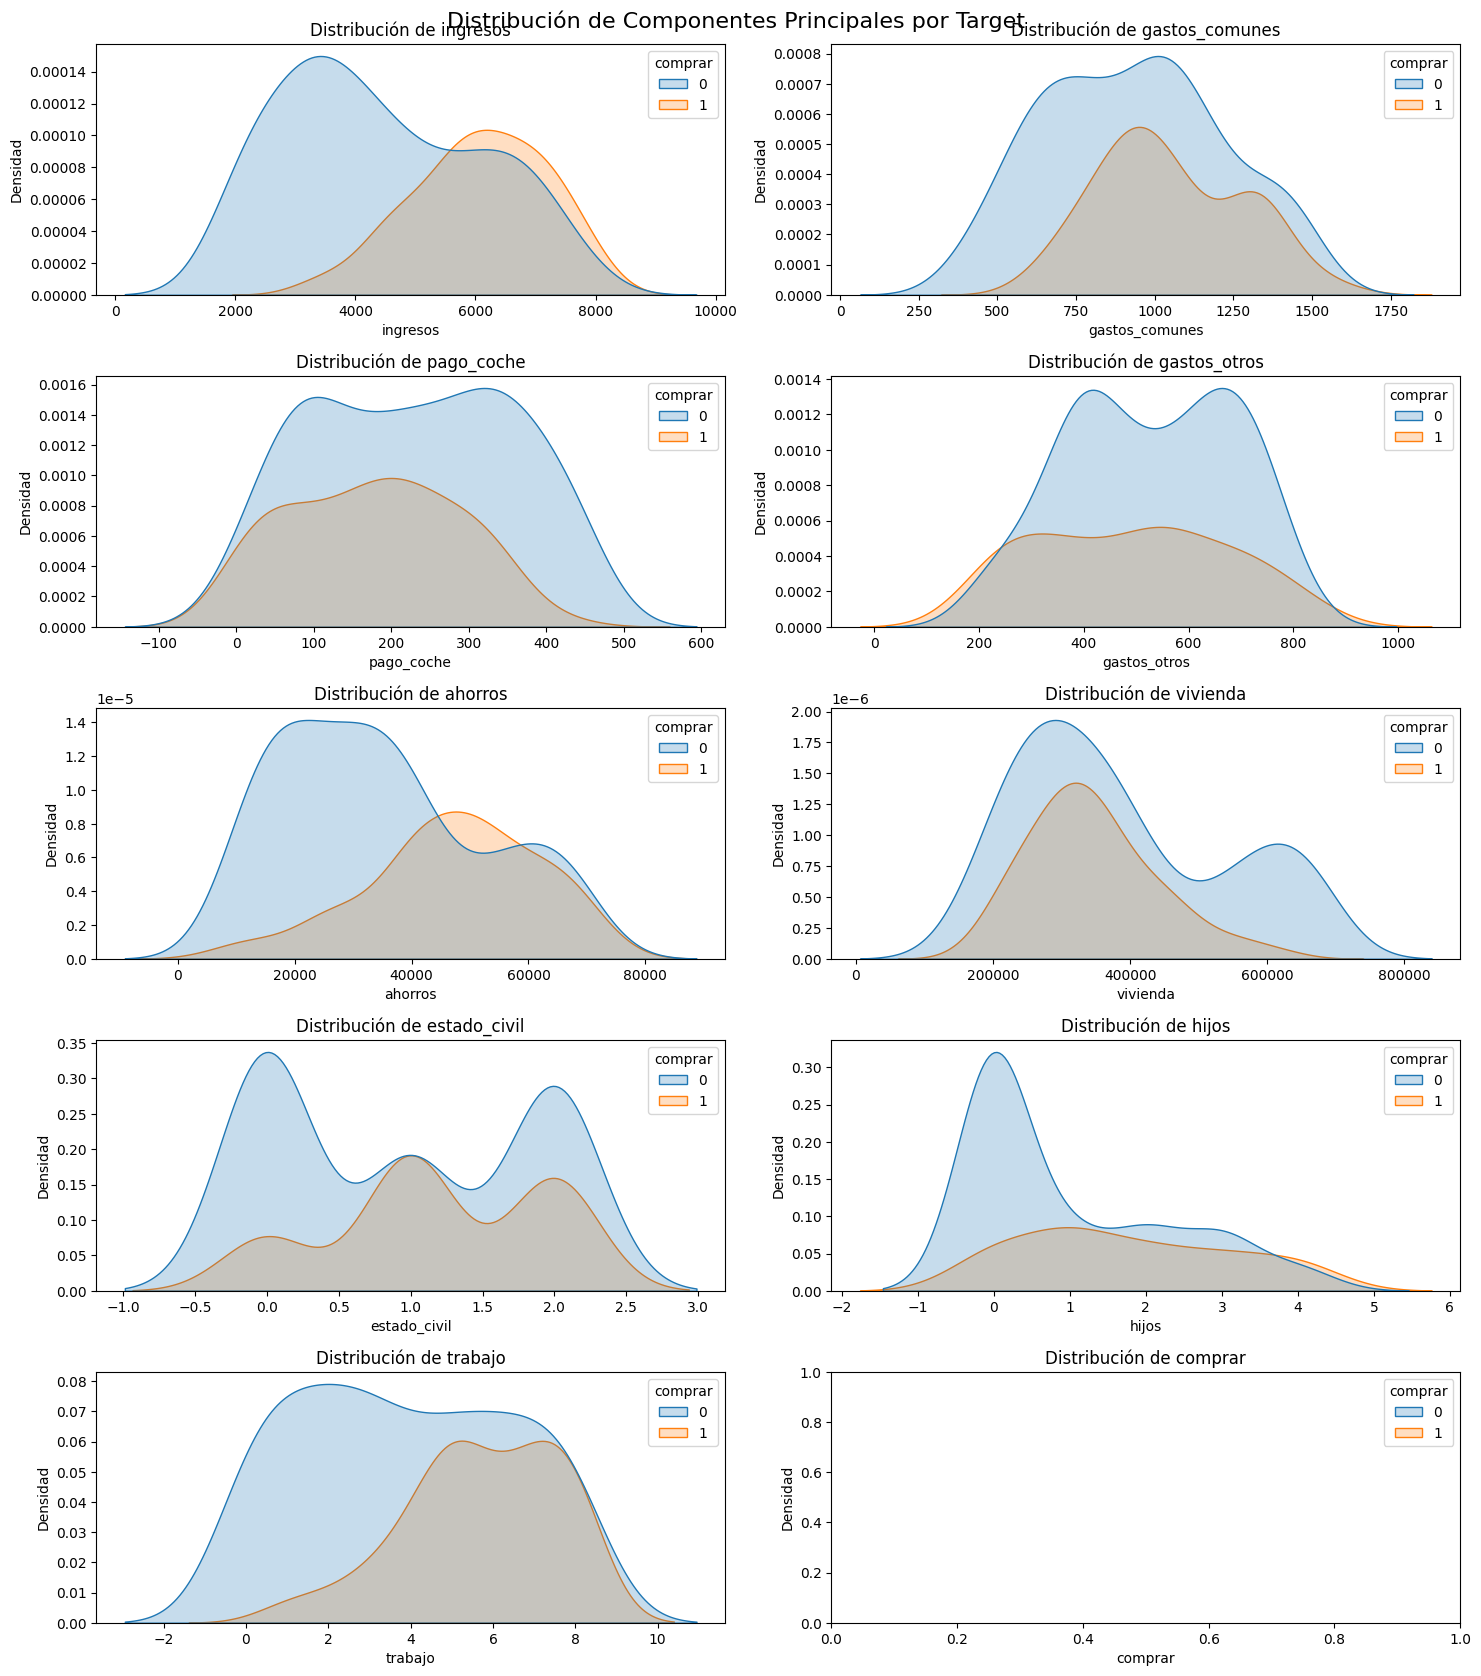

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

target = df['comprar']  #Añadimos que nuestro target, sea comprar

# Configuración de la figura
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
fig.suptitle('Distribución de Componentes Principales por Target', fontsize=16)

# Aplanamos la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Creamos a continuación un gráfico para cada componente principal
for i, column in enumerate(df.columns):
    sns.kdeplot(data=df, x=column, hue=target, ax=axes[i], shade=True)
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Densidad')

# Eliminar ejes sobrantes si los hay
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [13]:
# Creamos un objeto StandardScaler llamado scaler
scaler = StandardScaler()

#Eliminamos la variable target comprar.
df_sin_comprar = df.drop(columns=['comprar'])
# Ajustamos el scaler a los datos y transformamos

df_estandarizado = pd.DataFrame(scaler.fit_transform(df_sin_comprar), 
                                columns=df_sin_comprar.columns, 
                                index=df_sin_comprar.index)

# Mostramos las primeras filas del DataFrame estandarizado
df_estandarizado.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,0.620129,0.104689,-1.698954,0.504359,0.649475,0.195910,-1.227088,0.562374,-0.984420
1,1.063927,-0.101625,-0.712042,-0.515401,0.259224,1.937370,-0.029640,1.295273,0.596915
2,0.891173,0.226266,-0.912634,1.667244,1.080309,-0.379102,1.167809,-0.170526,1.387582
3,1.274209,1.128886,-1.578599,-1.559015,0.909604,2.114062,-1.227088,-0.903426,-0.589086
4,0.719611,-0.400042,0.090326,0.027279,0.159468,-0.179497,-1.227088,-0.903426,-0.589086


## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [18]:
pca_pipe = make_pipeline(PCA(n_components=9))
pca_pipe.fit(df_estandarizado)

modelo_pca = pca_pipe['pca']

In [19]:
pca_pipe['pca']

PCA(n_components=9)

In [22]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data = modelo_pca.components_,
    columns = df_estandarizado.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9']
)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
PC1,0.493720,0.318229,-0.123771,-0.111876,0.444650,0.462609,-0.252279,-0.259859,-0.290248
PC2,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
PC3,-0.091419,-0.363453,-0.516144,0.701986,0.191767,0.140513,-0.172885,0.112184,-0.036910
PC4,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
PC5,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
PC6,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
PC7,-0.154319,0.105598,-0.027333,-0.101876,-0.524584,0.641034,-0.212365,0.460067,-0.105053
PC8,-0.012732,0.010274,-0.061759,0.037977,-0.212759,0.260847,-0.204816,-0.532216,0.745630
PC9,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [23]:
modelo_pca.explained_variance_

array([2.70561424, 2.10697364, 1.05925553, 0.96649057, 0.87148938,
       0.50920879, 0.37495835, 0.27295496, 0.17783067])

In [24]:
modelo_pca.explained_variance_ratio_.cumsum()

array([0.29913557, 0.5320848 , 0.64919721, 0.75605343, 0.85240621,
       0.90870487, 0.95016066, 0.98033885, 1.        ])

In [26]:
#La varianza explicada por cada componente
varianza_explicada = modelo_pca.explained_variance_ratio_

#Imprimimos la varianza explicada por cada componente
print("Varianza explicada por cada Principal Component:")
for i, var in enumerate(varianza_explicada):
    print(f"PC{i+1}: {var:.4f}")

#La Varianza acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Imprimimos la varianza acumulada
print("\nVarianza acumulada:")
for i, var in enumerate(varianza_acumulada):
    print(f"PC1 a PC{i+1}: {var:.4f}")

# Varianza explicada por los primeros 5 componentes
varianza_5_componentes = np.sum(varianza_explicada[:5])
print(f"\nVarianza explicada por los primeros 5 componentes: {varianza_5_componentes:.4f}")

Varianza explicada por cada Principal Component:
PC1: 0.2991
PC2: 0.2329
PC3: 0.1171
PC4: 0.1069
PC5: 0.0964
PC6: 0.0563
PC7: 0.0415
PC8: 0.0302
PC9: 0.0197

Varianza acumulada:
PC1 a PC1: 0.2991
PC1 a PC2: 0.5321
PC1 a PC3: 0.6492
PC1 a PC4: 0.7561
PC1 a PC5: 0.8524
PC1 a PC6: 0.9087
PC1 a PC7: 0.9502
PC1 a PC8: 0.9803
PC1 a PC9: 1.0000

Varianza explicada por los primeros 5 componentes: 0.8524


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]


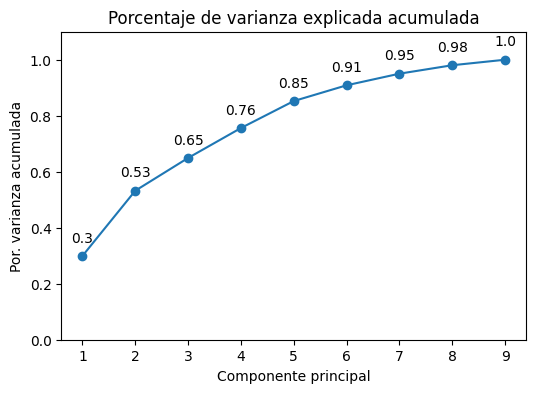

In [27]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df_estandarizado.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_estandarizado.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

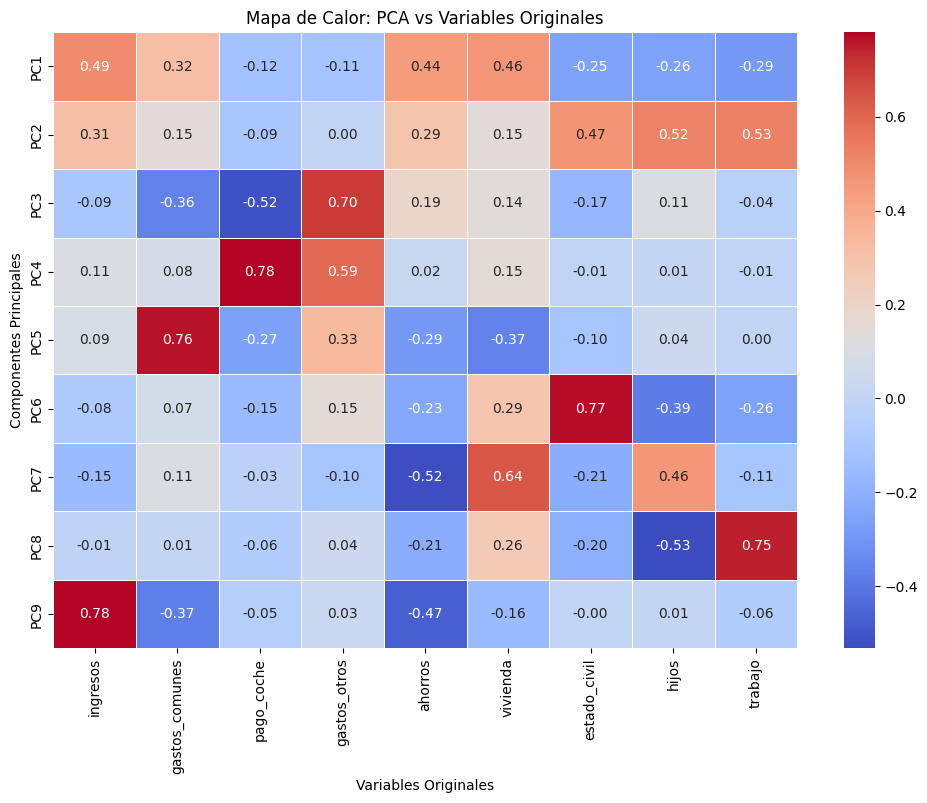


Variables más correlacionadas con PC1:
ingresos    0.493720
vivienda    0.462609
ahorros     0.444650
dtype: float64

Variables más correlacionadas con PC2:
trabajo         0.527156
hijos           0.521894
estado_civil    0.469044
dtype: float64

Variables más correlacionadas con PC3:
gastos_otros      0.701986
pago_coche        0.516144
gastos_comunes    0.363453
dtype: float64

Variables más correlacionadas con PC4:
pago_coche      0.780268
gastos_otros    0.590704
vivienda        0.150085
dtype: float64

Variables más correlacionadas con PC5:
gastos_comunes    0.763006
vivienda          0.365556
gastos_otros      0.330744
dtype: float64

Variables más correlacionadas con PC6:
estado_civil    0.767070
hijos           0.387964
vivienda        0.290799
dtype: float64

Variables más correlacionadas con PC7:
vivienda    0.641034
ahorros     0.524584
hijos       0.460067
dtype: float64

Variables más correlacionadas con PC8:
trabajo     0.745630
hijos       0.532216
vivienda    0.260847

In [32]:
componentes = modelo_pca.components_
df_componentes = pd.DataFrame(componentes, columns=df_estandarizado.columns, index=[f'PC{i+1}' for i in range(componentes.shape[0])])

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Creamos seguidamente el mapa de calor
sns.heatmap(df_componentes, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Mapa de Calor: PCA vs Variables Originales')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.show()

for i in range(9):
    print(f"\nVariables más correlacionadas con PC{i+1}:")
    correlaciones = pd.Series(componentes[i], index=df_componentes.columns)
    print(correlaciones.abs().sort_values(ascending=False).head(3))

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [46]:
from sklearn.model_selection import train_test_split

# Supongamos que 'target' es la columna objetivo
X = df.drop('comprar', axis=1)
y = df['comprar']

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Creamos un pipeline empleando un clasificador (por ejemplo: RandomForestClassifier)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10))
])

In [61]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=10,
                                        random_state=42))])

In [62]:
y_pred = pipeline.predict(X_test) #predecimos en test

In [63]:
from sklearn.metrics import accuracy_score

#Realizamos predicciones en train para calcular el accuracy en train y en test
y_train_pred = pipeline.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print(f'Accuracy en train: {accuracy_train:.2f}')
print(f'Accuracy en test: {accuracy_test:.2f}')

Accuracy en train: 0.86
Accuracy en test: 0.73


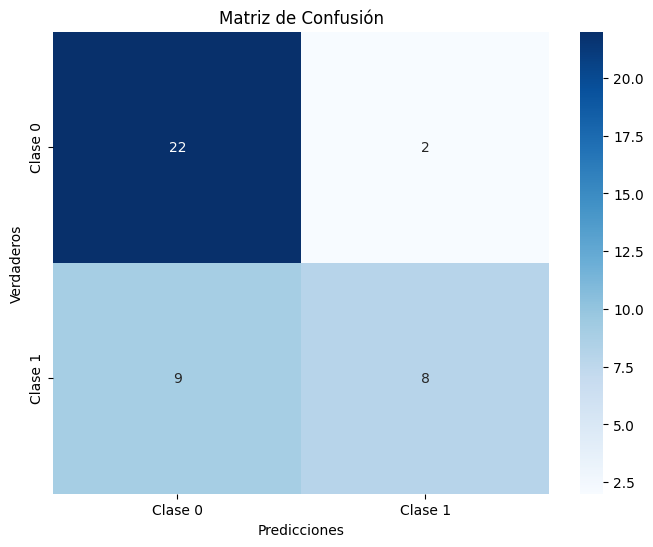

In [64]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión
confusion_max = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_max, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

Para mejorar el accuracy en el conjunto de prueba, podemos realizar una búsqueda de hiperparámetros utilizando el GridSearchCV. Esto nos permitirá encontrar la mejor combinación de parámetros para nuestro modelo clasificador.

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [0, 10, 20],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Mejor combinación de parámetros: {grid_search.best_params_}')

Mejor combinación de parámetros: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}


Guardamos por último el mejor modelo

In [68]:
import pickle

bestmodel = grid_search.best_estimator_
with open('mejor_modelo_pca.pkl', 'wb') as file:
    pickle.dump(bestmodel, file)